In [1]:
import numpy as np
import pandas as pd
import warnings
train_file = r'C:\python_project\logistic_regression\train_data_set.csv'
test_file = r'C:\python_project\logistic_regression\test_data_set.csv'
mt_train = pd.read_csv(train_file)
mt_test = pd.read_csv(test_file)


In [2]:
mt_train.columns.nunique()
mt_test.columns.nunique()

11

In [3]:
mt_test.head()

,created_at,entry_id,current,voltage,vibration,temperature,latitude,longitude,relay_status,humidity,failure
0,2022-04-05T13:30:41+05:30,1,2.223148,223.14752,0,37.36264,NaN,NaN,0,56,NaN
1,2022-04-05T13:30:58+05:30,2,2.213905,224.07919,0,37.48474,NaN,NaN,0,56,NaN
2,2022-04-05T13:31:14+05:30,3,2.333177,223.81500,0,37.60684,NaN,NaN,0,56,NaN
3,2022-04-05T13:31:30+05:30,4,2.097085,224.11105,0,37.24054,NaN,NaN,0,56,NaN
4,2022-04-05T13:31:47+05:30,5,2.249357,223.86400,0,37.36264,NaN,NaN,0,55,NaN


In [4]:
mt_train.head()

,created_at,entry_id,current,voltage,vibration,temperature,latitude,longitude,relay_status,humidity,failure
0,2022-03-15T17:17:51+05:30,1,1.938089,238.64746,0,37.11844,NaN,NaN,1,25,yes
1,2022-03-15T17:18:07+05:30,2,2.352603,215.62500,0,37.36264,NaN,NaN,0,25,no
2,2022-03-15T17:18:24+05:30,3,3.654926,152.06055,0,37.24054,NaN,NaN,0,46,no
3,2022-03-15T17:18:41+05:30,4,2.420011,195.74707,0,37.11844,NaN,NaN,0,26,no
4,2022-03-15T17:19:00+05:30,5,2.632627,177.10449,0,37.11844,NaN,NaN,0,26,no


In [5]:
mt_train['data']='train'
mt_test['data']='test'
mt_all = pd.concat([mt_train,mt_test],axis=0)

In [6]:
mt_all.nunique()

created_at      952
entry_id        759
current         952
voltage         943
vibration         2
temperature     142
latitude          0
longitude         0
relay_status      2
humidity         37
failure           2
data              2
dtype: int64

In [7]:
mt_all.head(1392)

,created_at,entry_id,current,voltage,vibration,temperature,latitude,longitude,relay_status,humidity,failure,data
0,2022-03-15T17:17:51+05:30,1,1.938089,238.64746,0,37.11844,NaN,NaN,1,25,yes,train
1,2022-03-15T17:18:07+05:30,2,2.352603,215.62500,0,37.36264,NaN,NaN,0,25,no,train
2,2022-03-15T17:18:24+05:30,3,3.654926,152.06055,0,37.24054,NaN,NaN,0,46,no,train
3,2022-03-15T17:18:41+05:30,4,2.420011,195.74707,0,37.11844,NaN,NaN,0,26,no,train
4,2022-03-15T17:19:00+05:30,5,2.632627,177.10449,0,37.11844,NaN,NaN,0,26,no,train
...,...,...,...,...,...,...,...,...,...,...,...,...
188,2022-04-05T14:45:50+05:30,189,2.447289,211.85481,0,43.83394,NaN,NaN,0,33,NaN,test
189,2022-04-05T14:46:06+05:30,190,2.425245,212.24246,0,44.07814,NaN,NaN,0,55,NaN,test
190,2022-04-05T14:46:22+05:30,191,4.281932,238.45860,0,45.12915,NaN,NaN,1,56,NaN,test
191,2022-04-05T14:46:38+05:30,192,3.826854,401.23560,0,47.26988,NaN,NaN,1,39,NaN,test


In [8]:
mt_all.drop(['created_at','entry_id','relay_status','longitude','latitude'],axis=1,inplace=True)
mt_all.head()

,current,voltage,vibration,temperature,humidity,failure,data
0,1.938089,238.64746,0,37.11844,25,yes,train
1,2.352603,215.62500,0,37.36264,25,no,train
2,3.654926,152.06055,0,37.24054,46,no,train
3,2.420011,195.74707,0,37.11844,26,no,train
4,2.632627,177.10449,0,37.11844,26,no,train


In [9]:
mt_all['vibration']=(mt_all['vibration']==1).astype(int)
mt_all['vibration'].unique()

array([0, 1])

In [10]:
mt_all['failure']=(mt_all['failure']=='yes').astype(int)
#mt_all['failure']=pd.to_numeric(mt_all['failure'],errors='coerce')
mt_all['failure'].unique()

array([1, 0])

In [11]:
mt_all['failure'].unique()

array([1, 0])

In [12]:
for col in mt_all.columns:
    if col=='data' or mt_all[col].isnull().sum()==0:continue
    mt_all.loc[mt_all[col].isnull(),col]=mt_all.loc[mt_all['data']=='train',col].mean()

In [13]:
mt_train = mt_all[mt_all['data']=='train']
del mt_train['data']
mt_test = mt_all[mt_all['data']=='test']
mt_test.drop(['data','failure'],axis=1,inplace=True)

F:\New folder\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
params = {'class_weight':['balanced'],'penalty':['l1','l2'],
         'C':np.linspace(0.0001,1000,10)}

In [16]:
model = LogisticRegression(fit_intercept=True)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='roc_auc',n_jobs=-1)

In [19]:
x_train = mt_train.drop('failure',axis=1)
y_train = mt_train['failure']


In [20]:
grid_search.fit(x_train,y_train)

F:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82535887        nan 0.98152174        nan 0.98244306
        nan 0.98291925        nan 0.98128364        nan 0.98271222
        nan 0.98196687        nan 0.98220497        nan 0.98312629
        nan 0.98291925]
  warnings.warn(
F:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.000000e-04, 1.111112e+02, 2.222223e+02, 3.333334e+02,
       4.444445e+02, 5.555556e+02, 6.666667e+02, 7.777778e+02,
       8.888889e+02, 1.000000e+03]),
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [21]:
grid_search.best_estimator_

LogisticRegression(C=888.8889, class_weight='balanced')

In [22]:
mt_train['failure'].nunique()
grid_search.cv_results_

{'mean_fit_time': array([0.00252299, 0.30471938, 0.007423  , 0.13522258, 0.0023998 ,
        0.16743126, 0.00594885, 0.15354161, 0.00332363, 0.13104973,
        0.00239992, 0.12848754, 0.00506153, 0.14515004, 0.00400054,
        0.14991925, 0.00422242, 0.15748944, 0.00189898, 0.13482602]),
 'std_fit_time': array([0.0036037 , 0.36046996, 0.00689763, 0.02017941, 0.00366576,
        0.02451233, 0.00755804, 0.03475716, 0.00408471, 0.03633508,
        0.00366594, 0.01345596, 0.00414932, 0.02371319, 0.00400055,
        0.01912846, 0.00423987, 0.02727995, 0.0031744 , 0.03446457]),
 'mean_score_time': array([0.        , 0.03000839, 0.        , 0.01247854, 0.        ,
        0.01269057, 0.        , 0.01060257, 0.        , 0.01143379,
        0.        , 0.01056478, 0.        , 0.01022518, 0.        ,
        0.00988109, 0.        , 0.00981274, 0.        , 0.00901697]),
 'std_score_time': array([0.        , 0.01546631, 0.        , 0.00558385, 0.        ,
        0.00408365, 0.        , 0.003810

In [23]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.983126 (std: 0.049935)
Parameters: {'C': 888.8889, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.982919 (std: 0.049877)
Parameters: {'C': 333.3334, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.982919 (std: 0.049877)
Parameters: {'C': 1000.0, 'class_weight': 'balanced', 'penalty': 'l2'}



In [25]:
test_prediction = grid_search.predict_proba(mt_test)

In [26]:
test_prediction

array([[9.88729053e-01, 1.12709474e-02],
       [9.87047010e-01, 1.29529896e-02],
       [9.84886407e-01, 1.51135928e-02],
       [9.89209335e-01, 1.07906653e-02],
       [9.86046749e-01, 1.39532513e-02],
       [9.91926901e-01, 8.07309927e-03],
       [9.88948091e-01, 1.10519086e-02],
       [9.90183205e-01, 9.81679452e-03],
       [9.90052848e-01, 9.94715165e-03],
       [9.87671146e-01, 1.23288540e-02],
       [9.93575169e-01, 6.42483053e-03],
       [9.91508256e-01, 8.49174382e-03],
       [9.83304291e-01, 1.66957086e-02],
       [9.89573681e-01, 1.04263195e-02],
       [9.85460207e-01, 1.45397929e-02],
       [9.93549227e-01, 6.45077289e-03],
       [9.88136621e-01, 1.18633787e-02],
       [9.89512772e-01, 1.04872278e-02],
       [9.90425072e-01, 9.57492760e-03],
       [9.93948664e-01, 6.05133583e-03],
       [9.91866336e-01, 8.13366376e-03],
       [9.94026190e-01, 5.97381024e-03],
       [9.95944424e-01, 4.05557637e-03],
       [9.95690575e-01, 4.30942463e-03],
       [9.923777

In [27]:
grid_search.classes_

array([0, 1])

In [28]:
train_score=grid_search.predict_proba(x_train)[:,1]
real = y_train

In [29]:
cutoffs = np.linspace(.001,0.999, 999)

In [30]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [31]:
 KS=[]

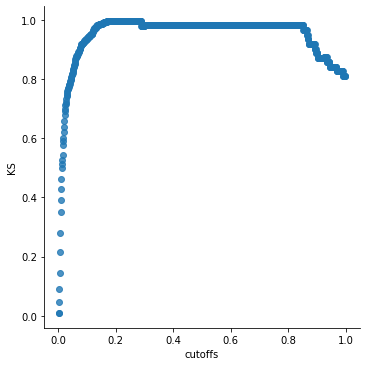

In [32]:
for cutoff in cutoffs:
 predicted=(train_score>cutoff).astype(int)
 TP=((real==1)&(predicted==1)).sum()
 FP=((real==0)&(predicted==1)).sum()
 TN=((real==0)&(predicted==0)).sum()
 FN=((real==1)&(predicted==0)).sum()
 
 ks=(TP/(TP+FN))-(FP/(TN+FP))
 KS.append(ks)

temp=pd.DataFrame({'cutoffs':cutoffs,'KS':KS})
sns.lmplot(x='cutoffs',y='KS',data=temp,fit_reg=False)

In [33]:
 ks


0.8095238095238095

In [34]:
test_hard_classes=(test_prediction>cutoffs[KS==max(KS)][0]).astype(int)

In [35]:
test_hard_classes

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [37]:
pd.DataFrame(test_hard_classes).to_csv("mysubmissionHlogistic.csv",index=False)